### Data Preprocessing

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
df=pd.read_csv("Social_Network_Ads.csv")


In [3]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [4]:
df.shape

(400, 5)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [9]:
#Checking for null values
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15632\2358186472.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

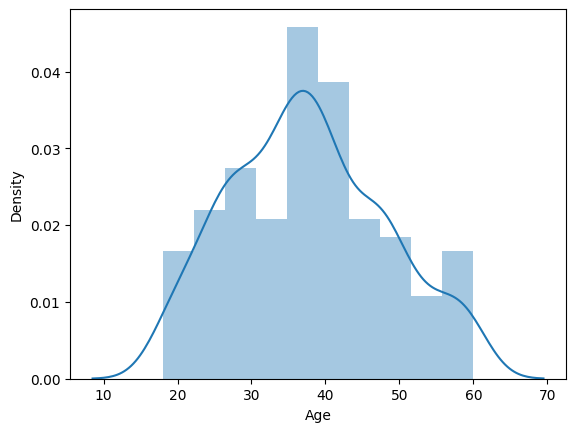

In [12]:
# Data Visualization
sns.distplot(df['Age'])

In [13]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15632\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15632\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

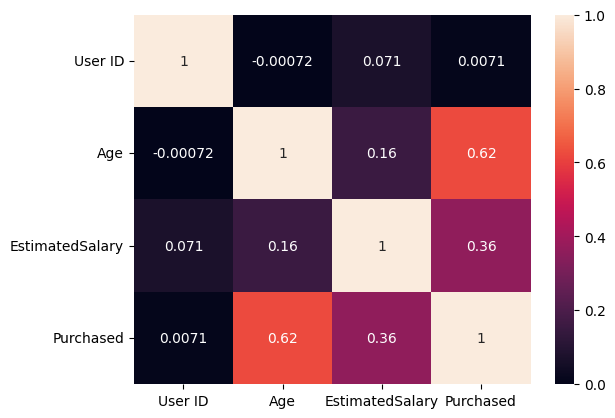

In [15]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='EstimatedSalary'>

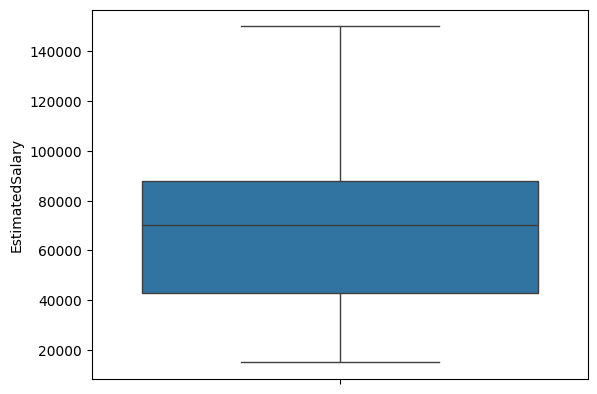

In [16]:
sns.boxplot(df.EstimatedSalary)

<Axes: ylabel='Age'>

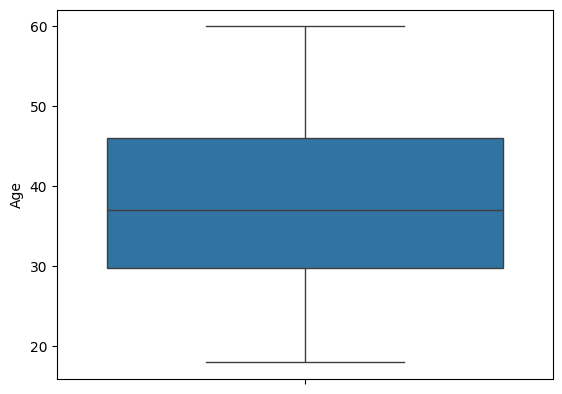

In [17]:
sns.boxplot(df.Age)

In [18]:
#Splitting Dependent and Independent Variables
x=df.iloc[:,1:4]
x.head()

Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000

In [19]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [20]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()


Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000

In [21]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [22]:
x_scaled

Gender       Age  EstimatedSalary
0       1.0  0.023810         0.029630
1       1.0  0.404762         0.037037
2       0.0  0.190476         0.207407
3       0.0  0.214286         0.311111
4       1.0  0.023810         0.451852
..      ...       ...              ...
395     0.0  0.666667         0.192593
396     1.0  0.785714         0.059259
397     0.0  0.761905         0.037037
398     1.0  0.428571         0.133333
399     0.0  0.738095         0.155556

[400 rows x 3 columns]

In [23]:
#Splitting Data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

### Model Building

In [29]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [30]:
model.fit(x_train,y_train)

GaussianNB()

In [31]:
pred=model.predict(x_test)

### Evaluation of Classification Model

In [41]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [33]:
accuracy_score(y_test,pred)

0.925

In [34]:
confusion_matrix(y_test,pred)

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [35]:
pd.crosstab(y_test,pred)

col_0       0   1
Purchased        
0          56   2
1           4  18

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



#### Roc-AUC curve

In [37]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.09594722, 0.17250905, 0.13319495, 0.0867453 , 0.11006422,
       0.0397755 , 0.10289474, 0.96001318, 0.01138736, 0.47552608,
       0.04166895, 0.038873  , 0.12693701, 0.2483256 , 0.02202044,
       0.54027453, 0.18819633, 0.01840984, 0.99638606, 0.1255031 ,
       0.10968601, 0.9955861 , 0.26427056, 0.85586364, 0.02219279,
       0.99588402, 0.08729702, 0.06352284, 0.16436085, 0.14823868,
       0.02760159, 0.19908161, 0.88479016, 0.12527323, 0.01797509,
       0.00733794, 0.02379313, 0.09507891, 0.06537723, 0.63950154,
       0.06473084, 0.22571331, 0.06704559, 0.13223981, 0.84765854,
       0.03447917, 0.24195669, 0.89489814, 0.02680129, 0.75685276,
       0.99518415, 0.12139484, 0.11494184, 0.53134451, 0.97171174,
       0.41064893, 0.08621971, 0.05000663, 0.62237315, 0.02217703,
       0.0894389 , 0.93219677, 0.01318146, 0.35014257, 0.01326984,
       0.96534617, 0.05390512, 0.02803671, 0.19356393, 0.36455302,
       0.96759435, 0.1687751 , 0.01789066, 0.46767699, 0.06762

In [42]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

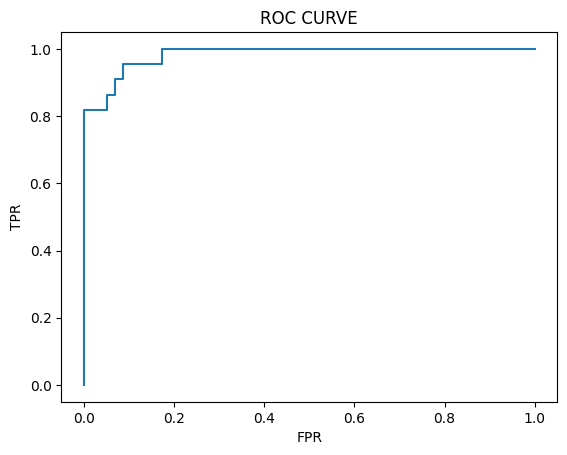

In [43]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()